# Import Library & Load Data

In [ ]:
!pip install xgboost

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Indo_AI/train_dataset.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1


# Data Preprocessing & EDA

## Data Info

In [ ]:
df.shape

(159256, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [ ]:
df.columns

Index(['id', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [ ]:
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1


In [ ]:
# prompt: maximize column

pd.set_option('display.max_columns', None)
df.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1


## Check Missing Value

In [ ]:
df.isnull().sum()

,0
id,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0


In [ ]:
df = df.drop('id', axis=1)
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1


## EDA

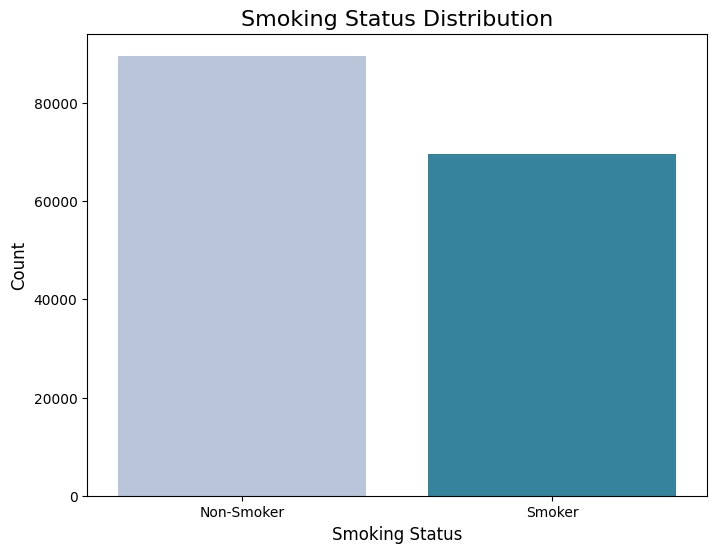

In [ ]:
# smoking distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='smoking', palette='PuBuGn')
plt.title('Smoking Status Distribution', fontsize=16)
plt.xlabel('Smoking Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Non-Smoker', 'Smoker'])
plt.show()

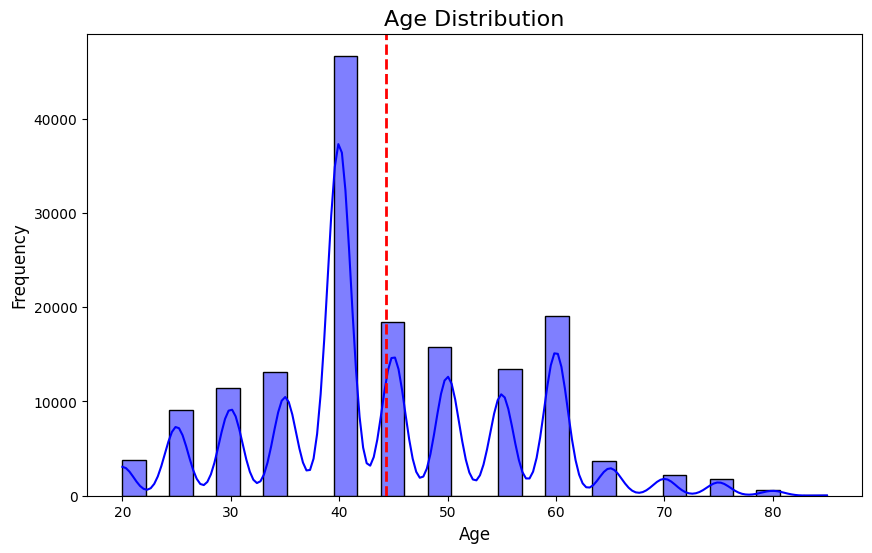

In [ ]:
# age distribution with mean
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, color='blue', kde=True)
plt.axvline(df['age'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Age')
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### Body Mass Index (BMI)

The BMI is calculated by dividing weight in kilograms by their height in metres squared.
- Underweight: BMI below 18.5.
- Normal weight: BMI between 18.5 and 24.9.
- Overweight: BMI between 25 and 29.9.
- Obese: BMI 30 or higher.

In [ ]:
print("Min weight:", df['weight(kg)'].min())
print("Max weight:", df['weight(kg)'].max())
print("Min height:", df['height(cm)'].min())
print("Max height:", df['height(cm)'].max())

Min weight: 30
Max weight: 130
Min height: 135
Max height: 190


In [ ]:
# BMI Formula
df['bmi'] = df['weight(kg)'] / ((df['height(cm)'] / 100) ** 2)

# Categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(categorize_bmi)

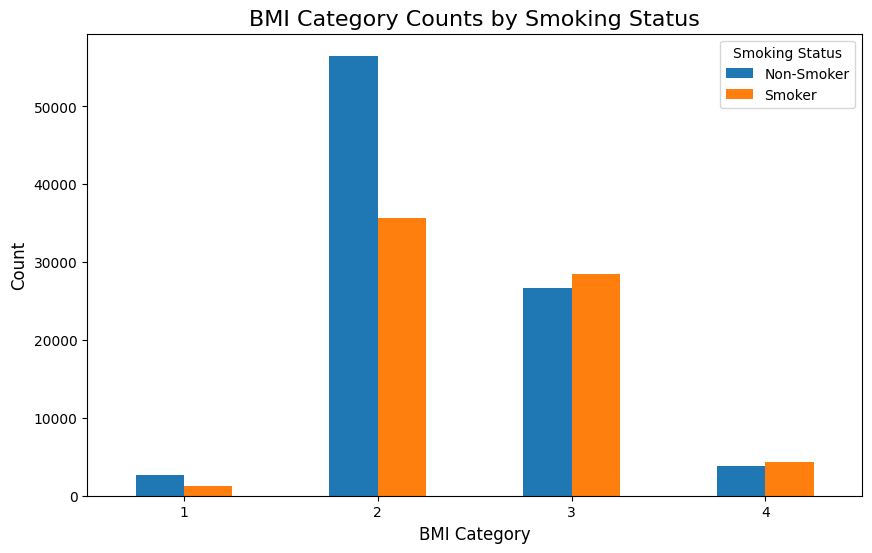

In [ ]:
# prompt: Display the counts of each BMI category for smokers and non-smokers using plot
bmi_smoker_counts = df.groupby(['bmi_category', 'smoking'])['bmi'].count().unstack()

bmi_smoker_counts.plot(kind='bar', figsize=(10, 6))
plt.title('BMI Category Counts by Smoking Status', fontsize=16)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Smoking Status', labels=['Non-Smoker', 'Smoker'])

plt.show()

### Blood Pressure

*It has since long been known that blood pressure and heart rate increase during smoking. These effects are specifically associated with nicotine while the other components of which more than a thousand have been isolated seem to be of minor importance. The rise in blood pressure is due both to an increase in cardiac output and total peripheral vascular resistance. The blood pressure rise appears immediately and occurs before any increase in circulating catecholamines. It is a paradox that while smoking acutely increases blood pressure, a slightly lower blood pressure level has been found among smokers than nonsmokers in larger epidemiological studies.*

https://pubmed.ncbi.nlm.nih.gov/9162447/

Blood Pressure Categories:
- Normal: Systolic (top number) less than 120 mmHg and diastolic (bottom number) less than 80 mmHg.
- Elevated: Systolic between 120 and 129 mmHg and diastolic less than 80 mmHg.
- Stage 1 Hypertension: Systolic between 130 and 139 mmHg or diastolic between 80 and 89 mmHg.
- Stage 2 Hypertension: Systolic 140 mmHg or higher or diastolic 90 mmHg or higher.

In [ ]:
def bp_category(sbp, dbp):
    if sbp < 120 and dbp < 80:
        return 'Normal'
    elif 120 <= sbp < 130 and dbp < 80:
        return 'Elevated'
    elif (130 <= sbp < 140) or (80 <= dbp < 90):
        return 'Hypertension Stage 1'
    elif (140 <= sbp) or (90 <= dbp):
        return 'Hypertension Stage 2'
    else:
        return 'Unknown'

df['BP_Class'] = df.apply(lambda row: bp_category(row[8], row[9]), axis=1)

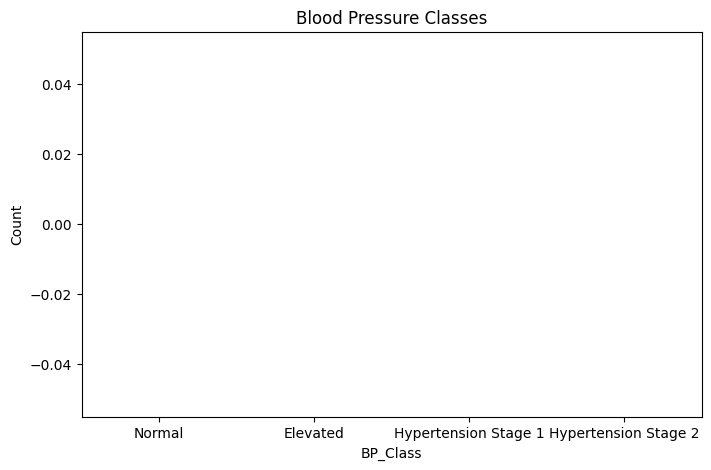

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='BP_Class', data=df, order=['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2'])
plt.title('Blood Pressure Classes')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### Fasting Blood Sugar

*Merokok dapat menyebabkan resistensi insulin dan mengakibatkan gangguan metabolisme glukosa.*

https://repositori.usu.ac.id/handle/123456789/7571

FBS Levels:
- Normal Fasting Blood Sugar: 70 to 99 mg/dL (3.9 to 5.5 mmol/L).
- Prediabetes: 100 to 125 mg/dL (5.6 to 6.9 mmol/L).
- Diabetes: 126 mg/dL (7.0 mmol/L) or higher on two separate tests.


In [ ]:
df['fasting blood sugar'].min()

46

In [ ]:
df['fasting blood sugar'].max()

375

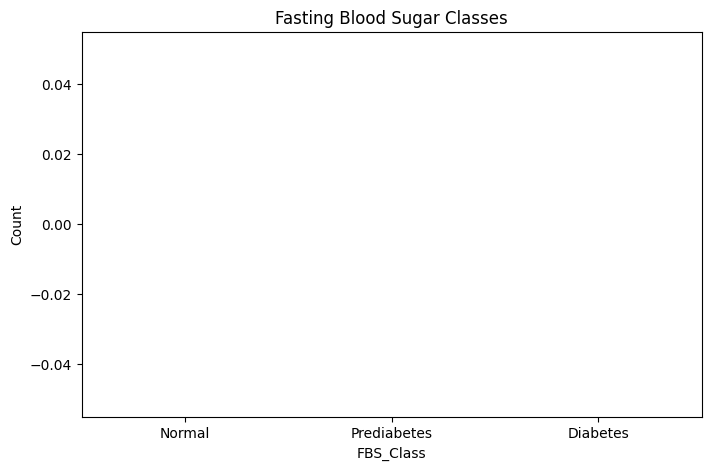

In [ ]:
def fbs_category(fbs):
    if fbs < 100:
        return 'Normal'
    elif 100 <= fbs < 126:
        return 'Prediabetes'
    else:
        return 'Diabetes'

df['FBS_Class'] = df['fasting blood sugar'].apply(fbs_category)

plt.figure(figsize=(8, 5))
sns.countplot(x='FBS_Class', data=df, order=['Normal', 'Prediabetes', 'Diabetes'])
plt.title('Fasting Blood Sugar Classes')
plt.ylabel('Count')

plt.show()

### Cholesterol

In [ ]:
df['Cholesterol'].min()

77

In [ ]:
df['Cholesterol'].max()

393

In [ ]:
def chol_category(chol):
    if chol < 200:
        return 'Desirable'
    elif 200 <= chol < 240:
        return 'Borderline High'
    else:
        return 'High'

df['Chol_Class'] = df['Cholesterol'].apply(chol_category)

In [ ]:
print(df[['bmi_category', 'BP_Class', 'FBS_Class', 'Chol_Class']].head())

   bmi_category  BP_Class  FBS_Class  Chol_Class
0             2         3          1           1
1             2         3          3           1
2             3         1          1           1
3             3         3          1           1
4             2         2          1           1


## Prepare Data for Modelling

In [ ]:
# non_numeric = df.select_dtypes(include=['object']).columns
# print("Non-numeric columns:", non_numeric)
# print(df[non_numeric].head())

### Create Dummies

In [ ]:
# categorical_cols = ['bmi_category', 'BP_Class', 'Chol_Class', 'FBS_Class']
# df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features
X = df.drop('smoking', axis=1)
y = df['smoking']

In [ ]:
X

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,bmi,bmi_category,BP_Class,FBS_Class,Chol_Class
0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,22.038567,2,3,1,1
1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,23.875115,2,3,3,1
2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,25.951557,3,1,1,1
3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,29.320988,3,3,1,1
4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,22.038567,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,40,155,45,69.0,1.5,2.0,1,1,127,80,64,238,47,72,159,14.5,1,0.8,25,26,13,0,18.730489,2,3,1,2
159252,50,155,75,82.0,1.0,1.0,1,1,120,80,89,213,202,64,108,14.5,1,0.6,21,20,18,0,31.217482,4,3,1,2
159253,40,160,50,66.0,1.5,1.0,1,1,114,70,84,189,45,87,93,10.9,1,0.6,15,9,12,0,19.531250,2,1,1,1
159254,50,165,75,92.0,1.2,1.0,1,1,121,90,122,165,148,55,80,14.4,1,1.1,22,17,37,0,27.548209,3,4,2,1


### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import joblib

scaler_save_path = '/content/drive/MyDrive/Indo_AI/scaler.pkl'
joblib.dump(scaler, scaler_save_path)

print(f"Scaler saved successfully at {scaler_save_path}")

Scaler saved successfully at /content/drive/MyDrive/Indo_AI/scaler.pkl


# Modelling with Logistic Regression

In [ ]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7457302524174306
              precision    recall  f1-score   support

           0       0.78      0.75      0.77     17783
           1       0.70      0.74      0.72     14069

    accuracy                           0.75     31852
   macro avg       0.74      0.74      0.74     31852
weighted avg       0.75      0.75      0.75     31852

Confusion Matrix:
[[13410  4373]
 [ 3726 10343]]


# Modelling with Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf}")

print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")

conf_matrix_rf

Accuracy: 0.7707836242622127
              precision    recall  f1-score   support

           0       0.82      0.75      0.79     17783
           1       0.72      0.80      0.75     14069

    accuracy                           0.77     31852
   macro avg       0.77      0.77      0.77     31852
weighted avg       0.78      0.77      0.77     31852

Confusion Matrix:


array([[13331,  4452],
       [ 2849, 11220]])

# Modelling with XGBoost

In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

print(classification_report(y_test, y_pred_xgb))

conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("XGBoost Confusion Matrix:")

conf_matrix_xgb

XGBoost Accuracy: 0.7792917242245385
              precision    recall  f1-score   support

           0       0.83      0.76      0.79     17783
           1       0.73      0.80      0.76     14069

    accuracy                           0.78     31852
   macro avg       0.78      0.78      0.78     31852
weighted avg       0.78      0.78      0.78     31852

XGBoost Confusion Matrix:


array([[13530,  4253],
       [ 2777, 11292]])

In [ ]:
print("Model Evaluation Report")
print("-" * 30)

models = {
    "Logistic Regression": (accuracy, classification_report(y_test, y_pred), conf_matrix),
    "Random Forest": (accuracy_rf, classification_report(y_test, y_pred_rf), conf_matrix_rf),
    "XGBoost": (accuracy_xgb, classification_report(y_test, y_pred_xgb), conf_matrix_xgb),
}

for model_name, metrics in models.items():
    accuracy, classification_rep, conf_matrix = metrics

    print(f"\n{model_name}:")
    print(f"  Accuracy: {accuracy}")
    print("\n  Classification Report:")
    print(classification_rep)
    print("\n  Confusion Matrix:")
conf_matrix


Model Evaluation Report
------------------------------

Logistic Regression:
  Accuracy: 0.7457302524174306

  Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77     17783
           1       0.70      0.74      0.72     14069

    accuracy                           0.75     31852
   macro avg       0.74      0.74      0.74     31852
weighted avg       0.75      0.75      0.75     31852


  Confusion Matrix:

Random Forest:
  Accuracy: 0.7707836242622127

  Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.79     17783
           1       0.72      0.80      0.75     14069

    accuracy                           0.77     31852
   macro avg       0.77      0.77      0.77     31852
weighted avg       0.78      0.77      0.77     31852


  Confusion Matrix:

XGBoost:
  Accuracy: 0.7792917242245385

  Classification Report:
              precision    rec

array([[13530,  4253],
       [ 2777, 11292]])

# Save XGB Model


In [ ]:
import joblib

# Save the trained XGBoost model
joblib.dump(xgb_model, '/content/drive/MyDrive/Indo_AI/xgboost_smoking_model.pkl')

print("XGBoost model saved successfully.")

XGBoost model saved successfully.
